In [3]:
import pandas as pd
import ast
import numpy as np

### Read Data: LLM and Human

In [5]:
llm = pd.read_csv("created_dataset_with_llms.csv")
llm

,problem_id,submission_id,LLM,status_in_folder,code,label
0,p03243,s556163757,GEMINI,Runtime,N = int(input())\nif N % 111 == 0:\n print(N)...,1
1,p02949,unrelated,GEMINI,Generate,from collections import defaultdict\n\ndef sol...,1
2,p02701,s743897659,LLAMA,Wrong,N = int(input())\na = []\n\nfor i in range(N):...,1
3,p03380,s136562567,GEMINI,Runtime,import math\nimport numpy\n\nn=int(input())\na...,1
4,p03229,unrelated,LLAMA,Generate,def max_sum_of_abs_diffs(arr):\n arr.sort...,1
...,...,...,...,...,...,...
2823,p03102,s534013981,LLAMA,Runtime,"import numpy as np\n\nN, M, C = map(int, input...",1
2824,p03593,unrelated,GEMINI,Generate,"h, w = map(int, input().split())\ns = []\nfor ...",1
2825,p03447,unrelated,LLAMA,Generate,"import sys\n\ndef get_left_amount(x, a, b):\n ...",1
2826,p03038,s764254181,LLAMA,Wrong,"import copy\nN, M = map(int, input().split())\...",1


In [ ]:
human = pd.read_csv("human_selected_dataset.csv")
human

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy,status_in_folder,code,label,LLM
0,s242112093,p03166,u575045134,1589850395,Python,PyPy3 (2.4.0),py,Accepted,1280.0,182272.0,518,NaN,Accepted,import sys\nsys.setrecursionlimit(1000000)\nde...,0,Human
1,s683590509,p02686,u626940762,1589211354,Python,Python (3.8.2),py,Runtime Error,24.0,9084.0,10,NaN,Runtime,print 'No',0,Human
2,s750755997,p03147,u393512980,1551202944,Python,Python (3.4.3),py,Runtime Error,21.0,3108.0,701,NaN,Runtime,"def solve(lst):\n def rec(left, right):\n ...",0,Human
3,s236038887,p02852,u547608423,1585879693,Python,Python (3.4.3),py,Wrong Answer,88.0,10492.0,946,NaN,Wrong,"N,M=map(int,input().split())\nS=input()\n\ncou...",0,Human
4,s332144989,p03327,u638795007,1574994991,Python,PyPy3 (2.4.0),py,Accepted,188.0,38384.0,533,NaN,Accepted,"def examA():\n N = I()\n ans = ""ABC""\n ...",0,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,s753221691,p02631,u025241948,1592793670,Python,Python (3.8.2),py,Wrong Answer,412.0,49240.0,304,NaN,Wrong,"N=int(input())\na_list=list(map(int,input().sp...",0,Human
4751,s418657209,p03303,u934119021,1592880002,Python,Python (3.8.2),py,Accepted,25.0,9160.0,98,NaN,Accepted,s = input()\nw = int(input())\nans = [s[i] for...,0,Human
4752,s484686381,p03186,u800704240,1549330313,Python,Python (3.4.3),py,Wrong Answer,18.0,2940.0,107,NaN,Wrong,"a,b,x = (int(i) for i in input().split())\n\nn...",0,Human
4753,s149048158,p03354,u785578220,1552749331,Python,Python (3.4.3),py,Wrong Answer,676.0,14188.0,1009,NaN,Wrong,import collections\nimport itertools\nimport o...,0,Human


### Ada Embeddings

In [ ]:
from openai import OpenAI
client = OpenAI(api_key="your-api-key-")

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], 
model=model).data[0].embedding

In [ ]:
ada_embeddings_llm = []
for i in range(len(llm)):
    #print(i)
    ada_embeddings_llm.append(get_embedding(llm.loc[i, "code"], model='text-embedding-ada-002'))
llm["ada_embedding"] = ada_embeddings_llm

ada_embeddings_human = []
for i in range(len(human)):
    #print(i)
    ada_embeddings_human.append(get_embedding(human.loc[i, "code"], model='text-embedding-ada-002'))
human["ada_embedding"] = ada_embeddings_human
human



### Concat Data: based on selected columns

In [ ]:
training_llm = llm[["problem_id","submission_id", "status_in_folder","LLM", "code", "ada_embedding","label",]]
training_human = human[["problem_id","submission_id", "status_in_folder","LLM", "code", "ada_embedding","label",]]


In [16]:
all_data = pd.concat([training_llm, training_human])
all_data


,problem_id,submission_id,status_in_folder,LLM,code,ada_embedding,label
0,p03243,s556163757,Runtime,GEMINI,N = int(input())\nif N % 111 == 0:\n print(N)...,"[0.009706709533929825, 2.121167017321568e-05, ...",1
1,p02949,unrelated,Generate,GEMINI,from collections import defaultdict\n\ndef sol...,"[0.04156259819865227, -0.01601836271584034, -0...",1
2,p02701,s743897659,Wrong,LLAMA,N = int(input())\na = []\n\nfor i in range(N):...,"[0.011799769476056099, -0.0023118883837014437,...",1
3,p03380,s136562567,Runtime,GEMINI,import math\nimport numpy\n\nn=int(input())\na...,"[0.027964850887656212, -0.001971880439668894, ...",1
4,p03229,unrelated,Generate,LLAMA,def max_sum_of_abs_diffs(arr):\n arr.sort...,"[0.009082085452973843, 0.011663861572742462, 0...",1
...,...,...,...,...,...,...,...
4750,p02631,s753221691,Wrong,Human,"N=int(input())\na_list=list(map(int,input().sp...","[0.010352607816457748, -0.00879936944693327, 0...",0
4751,p03303,s418657209,Accepted,Human,s = input()\nw = int(input())\nans = [s[i] for...,"[0.004301409237086773, -0.006217644549906254, ...",0
4752,p03186,s484686381,Wrong,Human,"a,b,x = (int(i) for i in input().split())\n\nn...","[0.015862584114074707, -0.013696947135031223, ...",0
4753,p03354,s149048158,Wrong,Human,import collections\nimport itertools\nimport o...,"[0.011294087395071983, -0.009908470325171947, ...",0


### Extract Stylometric Features

In [15]:
import re
def stylometric_python_code(python_code):
    lines = python_code.split("\n")
    
    number_of_code_lines = 0
    number_of_comments = 0
    number_of_functions = 0
    number_of_blank_lines = 0

    in_multiline_comment = False

    for line in lines:
        number_of_code_lines += 1
        stripped = line.rstrip()  # Preserve blank lines properly

        # Blank line detection
        if stripped == "":
            number_of_blank_lines += 1
            continue

        # Multi-line comment (docstring) detection
        if in_multiline_comment:
            number_of_comments += 1
            if '"""' in stripped or "'''" in stripped:
                in_multiline_comment = False
            continue

        # Single-line comment detection
        if stripped.startswith("#"):
            number_of_comments += 1
            continue

        # Multi-line comment start (detect triple quotes)
        if stripped.startswith(('"""', "'''")):
            in_multiline_comment = True
            number_of_comments += 1  # Count the whole docstring block as a comment
            if stripped.endswith(('"""', "'''")):
                in_multiline_comment = False
            continue

        # Detect inline comments correctly (avoid '#' inside strings)
        in_string = False
        comment_index = None
        for i, char in enumerate(stripped):
            if char in "\"'" and (i == 0 or stripped[i - 1] != "\\"):  # Detect string start (ignoring escaped quotes)
                in_string = not in_string  # Toggle in_string mode
            
            if char == "#" and not in_string:
                comment_index = i
                break  # Found valid comment outside a string

        if comment_index is not None:
            number_of_comments += 1
            stripped = stripped[:comment_index].rstrip()  # Remove comment part for further checks
    
    pattern = r"^\s*def\s+([\w]+)\s*\("

    matches = re.findall(pattern, python_code, re.MULTILINE)
    number_of_functions = len(matches)

    return {
        "number_of_code_lines": number_of_code_lines,
        "number_of_comments": number_of_comments,
        "number_of_functions": number_of_functions,
        "number_of_blank_lines": number_of_blank_lines
    }


In [20]:
def run_code(detect_data):
    """
    Applies the 'stylometric_python_code' function to each code sample in the DataFrame.
    Calculates and adds new stylometric features as columns.
    """

    # Apply the function directly to the 'code' column, returns dictionaries
    results = detect_data['code'].apply(stylometric_python_code)

    # Extract each metric into new columns using list comprehension and lambda
    detect_data['lines'] = results.apply(lambda x: x['number_of_code_lines'])
    detect_data['code_lines'] = results.apply(lambda x: x['number_of_code_lines']-x["number_of_blank_lines"])
    detect_data['comments'] = results.apply(lambda x: x['number_of_comments'])
    detect_data['functions'] = results.apply(lambda x: x['number_of_functions'])
    detect_data['blank_lines'] = results.apply(lambda x: x['number_of_blank_lines'])
    

    return detect_data


In [21]:
new_all = run_code(all_data)
new_all

,problem_id,submission_id,status_in_folder,LLM,code,ada_embedding,label,lines,code_lines,comments,functions,blank_lines
0,p03243,s556163757,Runtime,GEMINI,N = int(input())\nif N % 111 == 0:\n print(N)...,"[0.009706709533929825, 2.121167017321568e-05, ...",1,7,7,0,0,0
1,p02949,unrelated,Generate,GEMINI,from collections import defaultdict\n\ndef sol...,"[0.04156259819865227, -0.01601836271584034, -0...",1,40,32,4,1,8
2,p02701,s743897659,Wrong,LLAMA,N = int(input())\na = []\n\nfor i in range(N):...,"[0.011799769476056099, -0.0023118883837014437,...",1,8,6,0,0,2
3,p03380,s136562567,Runtime,GEMINI,import math\nimport numpy\n\nn=int(input())\na...,"[0.027964850887656212, -0.001971880439668894, ...",1,26,22,0,0,4
4,p03229,unrelated,Generate,LLAMA,def max_sum_of_abs_diffs(arr):\n arr.sort...,"[0.009082085452973843, 0.011663861572742462, 0...",1,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4750,p02631,s753221691,Wrong,Human,"N=int(input())\na_list=list(map(int,input().sp...","[0.010352607816457748, -0.00879936944693327, 0...",0,17,12,0,0,5
4751,p03303,s418657209,Accepted,Human,s = input()\nw = int(input())\nans = [s[i] for...,"[0.004301409237086773, -0.006217644549906254, ...",0,4,4,0,0,0
4752,p03186,s484686381,Wrong,Human,"a,b,x = (int(i) for i in input().split())\n\nn...","[0.015862584114074707, -0.013696947135031223, ...",0,7,6,0,0,1
4753,p03354,s149048158,Wrong,Human,import collections\nimport itertools\nimport o...,"[0.011294087395071983, -0.009908470325171947, ...",0,48,39,4,4,9


In [ ]:
new_all.to_csv("all_data_with_ada_embeddings_will_be_splitted_into_train_test_set.csv")

### Stylometric feature distributions used in the statistical analysis presented in **Figure 1** of the paper.

In [3]:
new_all

,problem_id,submission_id,status_in_folder,LLM,code,ada_embedding,label,lines,code_lines,comments,functions,blank_lines
0,p03243,s556163757,Runtime,GEMINI,N = int(input())\nif N % 111 == 0:\n print(N)...,"[0.009706709533929825, 2.121167017321568e-05, ...",1,7,7,0,0,0
1,p02949,unrelated,Generate,GEMINI,from collections import defaultdict\n\ndef sol...,"[0.04156259819865227, -0.01601836271584034, -0...",1,40,32,4,1,8
2,p02701,s743897659,Wrong,LLAMA,N = int(input())\na = []\n\nfor i in range(N):...,"[0.011799769476056099, -0.0023118883837014437,...",1,8,6,0,0,2
3,p03380,s136562567,Runtime,GEMINI,import math\nimport numpy\n\nn=int(input())\na...,"[0.027964850887656212, -0.001971880439668894, ...",1,26,22,0,0,4
4,p03229,unrelated,Generate,LLAMA,def max_sum_of_abs_diffs(arr):\n arr.sort...,"[0.009082085452973843, 0.011663861572742462, 0...",1,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7578,p02631,s753221691,Wrong,Human,"N=int(input())\na_list=list(map(int,input().sp...","[0.010352607816457748, -0.00879936944693327, 0...",0,17,12,0,0,5
7579,p03303,s418657209,Accepted,Human,s = input()\nw = int(input())\nans = [s[i] for...,"[0.004301409237086773, -0.006217644549906254, ...",0,4,4,0,0,0
7580,p03186,s484686381,Wrong,Human,"a,b,x = (int(i) for i in input().split())\n\nn...","[0.015862584114074707, -0.013696947135031223, ...",0,7,6,0,0,1
7581,p03354,s149048158,Wrong,Human,import collections\nimport itertools\nimport o...,"[0.011294087395071983, -0.009908470325171947, ...",0,48,39,4,4,9


In [6]:
human_written = new_all[new_all["LLM"] == "Human"]
llm_written = new_all[new_all["LLM"] != "Human"]


In [7]:
print(human_written["code_lines"].mean())
print(human_written["blank_lines"].mean())
print(human_written["comments"].mean())
print(human_written["functions"].mean())


19.58464773922187
3.4439537329127234
1.128496319663512
0.7276550998948476


In [9]:
print(llm_written[llm_written["LLM"]=="LLAMA"]["code_lines"].mean())
print(llm_written[llm_written["LLM"]=="LLAMA"]["blank_lines"].mean())
print(llm_written[llm_written["LLM"]=="LLAMA"]["comments"].mean())
print(llm_written[llm_written["LLM"]=="LLAMA"]["functions"].mean())



16.454352441613587
2.6666666666666665
0.8662420382165605
0.7643312101910829


In [10]:
print(llm_written[llm_written["LLM"]=="GEMINI"]["code_lines"].mean())
print(llm_written[llm_written["LLM"]=="GEMINI"]["blank_lines"].mean())
print(llm_written[llm_written["LLM"]=="GEMINI"]["comments"].mean())
print(llm_written[llm_written["LLM"]=="GEMINI"]["functions"].mean())



16.633966244725737
2.679324894514768
0.7489451476793249
0.5411392405063291


In [11]:
print(llm_written[llm_written["LLM"]=="CODESTRAL"]["code_lines"].mean())
print(llm_written[llm_written["LLM"]=="CODESTRAL"]["blank_lines"].mean())
print(llm_written[llm_written["LLM"]=="CODESTRAL"]["comments"].mean())
print(llm_written[llm_written["LLM"]=="CODESTRAL"]["functions"].mean())



16.763326226012794
3.2825159914712154
1.2046908315565032
0.4914712153518124


## TRAINING

### Data Read & Split

In [24]:
data = pd.read_csv("all_data_with_ada_embeddings_will_be_splitted_into_train_test_set.csv")
data

,problem_id,submission_id,status_in_folder,LLM,code,ada_embedding,label,lines,code_lines,comments,functions,blank_lines
0,p03243,s556163757,Runtime,GEMINI,N = int(input())\nif N % 111 == 0:\n print(N)...,"[0.009706709533929825, 2.121167017321568e-05, ...",1,7,7,0,0,0
1,p02949,unrelated,Generate,GEMINI,from collections import defaultdict\n\ndef sol...,"[0.04156259819865227, -0.01601836271584034, -0...",1,40,32,4,1,8
2,p02701,s743897659,Wrong,LLAMA,N = int(input())\na = []\n\nfor i in range(N):...,"[0.011799769476056099, -0.0023118883837014437,...",1,8,6,0,0,2
3,p03380,s136562567,Runtime,GEMINI,import math\nimport numpy\n\nn=int(input())\na...,"[0.027964850887656212, -0.001971880439668894, ...",1,26,22,0,0,4
4,p03229,unrelated,Generate,LLAMA,def max_sum_of_abs_diffs(arr):\n arr.sort...,"[0.009082085452973843, 0.011663861572742462, 0...",1,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7578,p02631,s753221691,Wrong,Human,"N=int(input())\na_list=list(map(int,input().sp...","[0.010352607816457748, -0.00879936944693327, 0...",0,17,12,0,0,5
7579,p03303,s418657209,Accepted,Human,s = input()\nw = int(input())\nans = [s[i] for...,"[0.004301409237086773, -0.006217644549906254, ...",0,4,4,0,0,0
7580,p03186,s484686381,Wrong,Human,"a,b,x = (int(i) for i in input().split())\n\nn...","[0.015862584114074707, -0.013696947135031223, ...",0,7,6,0,0,1
7581,p03354,s149048158,Wrong,Human,import collections\nimport itertools\nimport o...,"[0.011294087395071983, -0.009908470325171947, ...",0,48,39,4,4,9


In [27]:
import ast
data["ada_embedding_vector"] = data.ada_embedding.apply(lambda x: ast.literal_eval(x))
data.head()

,problem_id,submission_id,status_in_folder,LLM,code,ada_embedding,label,lines,code_lines,comments,functions,blank_lines,ada_embedding_vector
0,p03243,s556163757,Runtime,GEMINI,N = int(input())\nif N % 111 == 0:\n print(N)...,"[0.009706709533929825, 2.121167017321568e-05, ...",1,7,7,0,0,0,"[0.009706709533929825, 2.121167017321568e-05, ..."
1,p02949,unrelated,Generate,GEMINI,from collections import defaultdict\n\ndef sol...,"[0.04156259819865227, -0.01601836271584034, -0...",1,40,32,4,1,8,"[0.04156259819865227, -0.01601836271584034, -0..."
2,p02701,s743897659,Wrong,LLAMA,N = int(input())\na = []\n\nfor i in range(N):...,"[0.011799769476056099, -0.0023118883837014437,...",1,8,6,0,0,2,"[0.011799769476056099, -0.0023118883837014437,..."
3,p03380,s136562567,Runtime,GEMINI,import math\nimport numpy\n\nn=int(input())\na...,"[0.027964850887656212, -0.001971880439668894, ...",1,26,22,0,0,4,"[0.027964850887656212, -0.001971880439668894, ..."
4,p03229,unrelated,Generate,LLAMA,def max_sum_of_abs_diffs(arr):\n arr.sort...,"[0.009082085452973843, 0.011663861572742462, 0...",1,3,3,0,1,0,"[0.009082085452973843, 0.011663861572742462, 0..."


In [5]:
from sklearn.model_selection import train_test_split
"""
    Train-test Split
"""
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(6066, 12)
(1517, 12)


In [29]:
test_data.groupby("LLM").count()

,problem_id,submission_id,status_in_folder,code,ada_embedding,label,lines,code_lines,comments,functions,blank_lines,ada_embedding_vector
LLM,,,,,,,,,,,,
CODESTRAL,200,200,200,200,200,200,200,200,200,200,200,200
GEMINI,206,206,206,206,206,206,206,206,206,206,206,206
Human,922,922,922,922,922,922,922,922,922,922,922,922
LLAMA,189,189,189,189,189,189,189,189,189,189,189,189


In [30]:
train_data.groupby("LLM").count()

,problem_id,submission_id,status_in_folder,code,ada_embedding,label,lines,code_lines,comments,functions,blank_lines,ada_embedding_vector
LLM,,,,,,,,,,,,
CODESTRAL,738,738,738,738,738,738,738,738,738,738,738,738
GEMINI,742,742,742,742,742,742,742,742,742,742,742,742
Human,3833,3833,3833,3833,3833,3833,3833,3833,3833,3833,3833,3833
LLAMA,753,753,753,753,753,753,753,753,753,753,753,753


(-1.0999999837966983,
 1.0999999992284142,
 -1.0999988373862861,
 1.099999592954451)

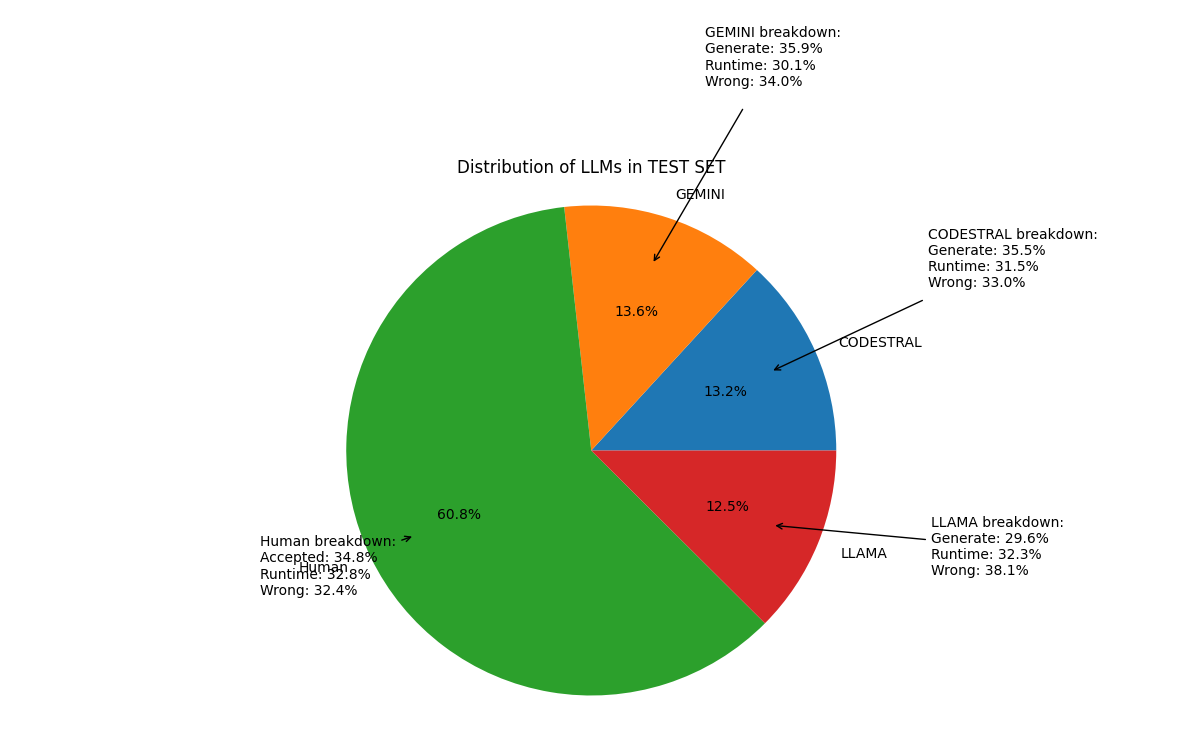

In [13]:
import matplotlib.pyplot as plt
import numpy as np
tst_dt_grpd = test_data.groupby(["LLM","status_in_folder"]).count()
tst_dt_grpd = tst_dt_grpd.reset_index()[["LLM","status_in_folder","code"]]

# Create figure and axis
plt.figure(figsize=(15,7))

# Get LLM distribution data
llm_data = tst_dt_grpd.groupby('LLM')['code'].sum()

# Create pie chart
plt.pie(llm_data, labels=llm_data.index, autopct='%1.1f%%')
plt.title('Distribution of LLMs in TEST SET')

# Get status distribution by LLM
status_by_llm = tst_dt_grpd.groupby(['LLM', 'status_in_folder'])['code'].sum()

# Calculate angles for text placement
angles = {}
start_angle = 0
for llm, count in llm_data.items():
    # Calculate middle angle for this LLM segment
    angle = start_angle + (count/llm_data.sum() * 360)/2
    angles[llm] = angle
    start_angle += (count/llm_data.sum() * 360)

# Add text annotations with arrows
for llm in llm_data.index:
    angle = angles[llm]
    rad = angle * (np.pi/180)  # Convert to radians
    
    # Calculate text position
    x = 1.5 * np.cos(rad)
    y = 1.5 * np.sin(rad)
    
    # Create status breakdown text
    status_text = f"\n{llm} breakdown:\n"
    for status in status_by_llm[llm].index:
        pct = (status_by_llm[llm][status] / llm_data[llm]) * 100
        status_text += f"{status}: {pct:.1f}%\n"
    
    # Add arrow and text
    plt.annotate(status_text,
                xy=(0.8*np.cos(rad), 0.8*np.sin(rad)),
                xytext=(x, y),
                arrowprops=dict(arrowstyle="->"))

plt.axis('equal')


(-1.0999992452297167,
 1.0999999640585578,
 -1.0999982648860493,
 1.0999998748983617)

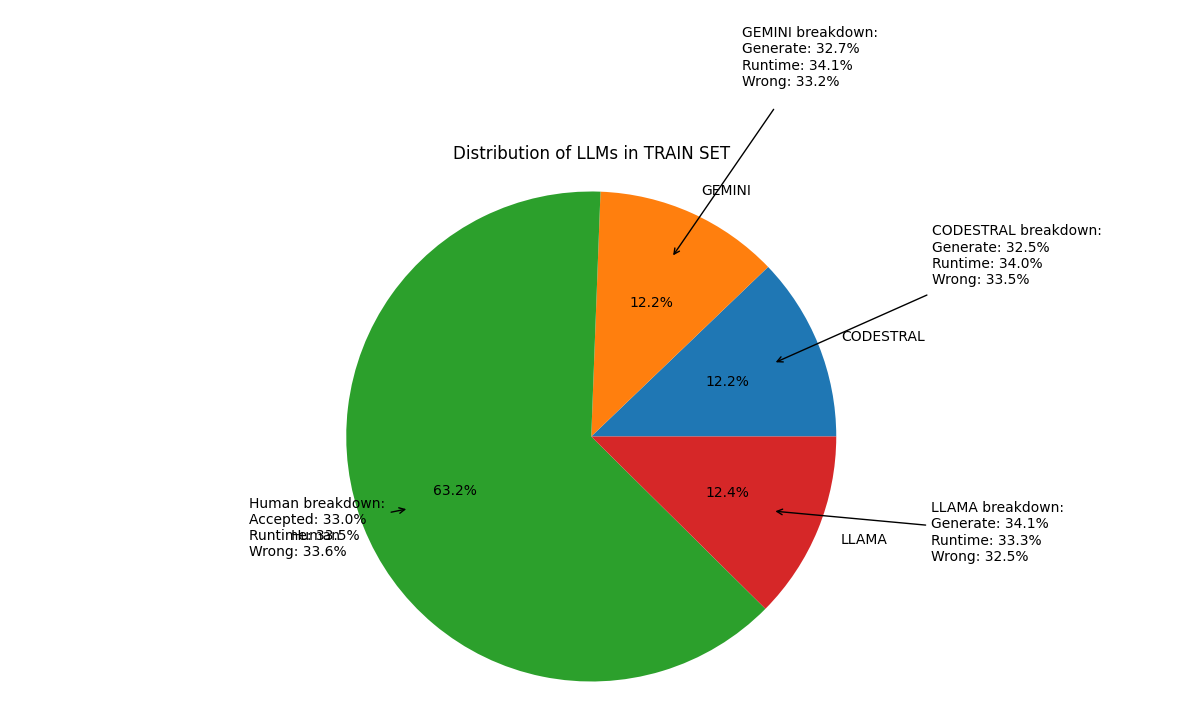

In [25]:
import matplotlib.pyplot as plt
import numpy as np
trn_dt_grpd = train_data.groupby(["LLM","status_in_folder"]).count()
trn_dt_grpd = trn_dt_grpd.reset_index()[["LLM","status_in_folder","code"]]

# Create figure and axis
plt.figure(figsize=(15,7))

# Get LLM distribution data
llm_data = trn_dt_grpd.groupby('LLM')['code'].sum()

# Create pie chart
plt.pie(llm_data, labels=llm_data.index, autopct='%1.1f%%')
plt.title('Distribution of LLMs in TRAIN SET')

# Get status distribution by LLM
status_by_llm = trn_dt_grpd.groupby(['LLM', 'status_in_folder'])['code'].sum()

# Calculate angles for text placement
angles = {}
start_angle = 0
for llm, count in llm_data.items():
    # Calculate middle angle for this LLM segment
    angle = start_angle + (count/llm_data.sum() * 360)/2
    angles[llm] = angle
    start_angle += (count/llm_data.sum() * 360)

# Add text annotations with arrows
for llm in llm_data.index:
    angle = angles[llm]
    rad = angle * (np.pi/180)  # Convert to radians
    
    # Calculate text position
    x = 1.5 * np.cos(rad)
    y = 1.5 * np.sin(rad)
    
    # Create status breakdown text
    status_text = f"\n{llm} breakdown:\n"
    for status in status_by_llm[llm].index:
        pct = (status_by_llm[llm][status] / llm_data[llm]) * 100
        status_text += f"{status}: {pct:.1f}%\n"
    
    # Add arrow and text
    plt.annotate(status_text,
                xy=(0.8*np.cos(rad), 0.8*np.sin(rad)),
                xytext=(x, y),
                arrowprops=dict(arrowstyle="->"))

plt.axis('equal')


### Training & Results: Ada/TF-IDF

In [31]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def print_metric_scores(y_test, y_pred):
    """
        Calculates and prints F1-score, accuracy, precision, and recall for classification results.
    """
    f1 = "{:.4f}".format(f1_score(y_test, y_pred))
    acc = "{:.4f}".format(accuracy_score(y_test, y_pred))
    pre = "{:.4f}".format(precision_score(y_test, y_pred))
    rec = "{:.4f}".format(recall_score(y_test, y_pred))
    print("f1:",f1, "   acc:", acc, "   pre:", pre, "   rec:", rec)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize TF-IDF vectorizer to convert text to feature vectors (top 5000 terms)
tfidf = TfidfVectorizer(max_features=5000)

def train_xgb(xtrain, ytrain, xtest, ytest):
    """
    Trains an XGBoost classifier and prints evaluation metrics.
    """
    xgb_clf = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    xgb_clf.fit(xtrain, ytrain)
    y_pred = xgb_clf.predict(xtest)
    print_metric_scores(ytest, y_pred)
    return xgb_clf

def train_rf(X_train, X_test, y_train, y_test):
    """
    Trains a Random Forest classifier and prints evaluation metrics.
    """
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    print_metric_scores(y_test, y_pred)
    return rf_classifier

def train_svm(X_train, X_test, y_train, y_test):
    """
    Trains an SVM classifier and prints evaluation metrics.
    """
    svm_classifier = SVC()
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    print_metric_scores(y_test, y_pred)
    return svm_classifier


In [34]:
# Prepare Ada embedding vectors as input features
X_train_ada = np.stack(train_data["ada_embedding_vector"].values)
X_test_ada = np.stack(test_data["ada_embedding_vector"].values)

# Prepare TF-IDF features from code texts
X_train_tf_idf = tfidf.fit_transform(train_data['code'])
X_test_tf_idf = tfidf.transform(test_data['code'])

# Extract labels for training and testing
y_train = train_data['label']
y_test = test_data['label']


### Values of **Table 2**

In [35]:
print("XGB")
print("\t TF-IDF")
xgb_classifier_trained_on_tf_idf = train_xgb(X_train_tf_idf, y_train, X_test_tf_idf, y_test)
print("\t ADA")
xgb_classifier_trained_on_ada_embeddings = train_xgb(X_train_ada, y_train, X_test_ada, y_test)
print("-------------------------------------------------------------")
print("RF")
print("\t TF-IDF")
rf_classifier_trained_on_tf_idf = train_rf(X_train_tf_idf, X_test_tf_idf, y_train, y_test)
print("\t ADA")
rf_classifier_trained_on_ada_embeddings = train_rf(X_train_ada, X_test_ada, y_train, y_test)
print("-------------------------------------------------------------")
print("SVM")
print("\t TF-IDF")
svm_classifier_trained_on_tf_idf = train_svm(X_train_tf_idf, X_test_tf_idf, y_train, y_test)
print("\t ADA")
svm_classifier_trained_on_ada_embeddings = train_svm(X_train_ada, X_test_ada, y_train, y_test)

XGB
	 TF-IDF
f1: 0.3281    acc: 0.6599    pre: 0.7283    rec: 0.2118
	 ADA
f1: 0.4684    acc: 0.6559    pre: 0.5943    rec: 0.3866
-------------------------------------------------------------
RF
	 TF-IDF
f1: 0.3175    acc: 0.5748    pre: 0.4286    rec: 0.2521
	 ADA
f1: 0.3865    acc: 0.6401    pre: 0.5831    rec: 0.2891
-------------------------------------------------------------
SVM
	 TF-IDF
f1: 0.2984    acc: 0.6249    pre: 0.5602    rec: 0.2034
	 ADA
f1: 0.5046    acc: 0.7152    pre: 0.7942    rec: 0.3697


### Results for **Table 3** and **Table 4**

In [51]:
# --- Split test data based on code author (LLM or Human) ---
human_test = test_data[test_data["LLM"] == "Human"]
llama_test = test_data[test_data["LLM"] == "LLAMA"]
gemini_test = test_data[test_data["LLM"] == "GEMINI"]
codestral_test = test_data[test_data["LLM"] == "CODESTRAL"]

# --- Split test data based on submission status ---
test_accepted_and_generated = test_data[test_data["status_in_folder"].isin(["Accepted", "Generate"])]
test_wrong = test_data[test_data["status_in_folder"] == "Wrong"]
test_runtime = test_data[test_data["status_in_folder"] == "Runtime"]

# --- Create mixed subsets to analyze specific scenarios ---
# Wrong codes by LLMs + Accepted codes by Humans
test_wrong_llm_and_accepted_human = test_data[
    ((test_data["status_in_folder"] == "Wrong") & (test_data["LLM"] != "Human")) |
    ((test_data["status_in_folder"] == "Accepted") & (test_data["LLM"] == "Human"))
]

# Runtime errors by LLMs + Accepted codes by Humans
test_runtime_llm_and_accepted_human = test_data[
    ((test_data["status_in_folder"] == "Runtime") & (test_data["LLM"] != "Human")) |
    ((test_data["status_in_folder"] == "Accepted") & (test_data["LLM"] == "Human"))
]

# --- Grouping datasets for evaluation ---
# Grouped by author
test_data_author_tuple = [
    ("Human", human_test),
    ("LLAMA", llama_test),
    ("Gemini", gemini_test),
    ("Codestral", codestral_test)
]

# Grouped by code status
test_data_status_tuple = [
    ("Accepted+Generated", test_accepted_and_generated),
    ("Wrong", test_wrong),
    ("Runtime", test_runtime)
]


# Full test set
test_all = [("All Test Set", test_data)]

# Combined all splits for evaluation loops
test_data_tuple_all = test_data_author_tuple + test_data_status_tuple + test_all


In [52]:
def get_results_of_classifier_feature_combination(classifier_name_in_str_format, classifier, feature_extractor, test_data_tuple):
    """
    Evaluates a given classifier with a specified feature set across multiple test subsets.
    
    Parameters:
    - classifier_name_in_str_format (str): Classifier name for result labeling (e.g., 'RF', 'XGB', 'SVM').
    - classifier: Pre-trained classifier object.
    - feature_extractor (str): Feature type ('ada' or 'tfidf').
    - test_data_tuple (list of tuples): List containing test set name and corresponding DataFrame.
    
    Returns:
    - pd.DataFrame: Evaluation results with F1, Accuracy, Precision, Recall per test subset.
    """
    results = []
    for test_set, test_data_subset in test_data_tuple:

        feature_extractor_name = ""

        # Select features and make predictions based on extractor type
        if feature_extractor == "ada":
            y_pred = classifier.predict(np.stack(test_data_subset["ada_embedding_vector"].values))
            feature_extractor_name = "Ada Embeddings"
        elif feature_extractor == "tfidf":
            y_pred = classifier.predict(tfidf.transform(test_data_subset['code']))
            feature_extractor_name = "TF-IDF Vector"

        # Calculate evaluation metrics
        f1 = f1_score(test_data_subset['label'], y_pred)
        accuracy = accuracy_score(test_data_subset['label'], y_pred)
        precision = precision_score(test_data_subset['label'], y_pred)
        recall = recall_score(test_data_subset['label'], y_pred)
        
        # Append results for this test set
        results.append({
            'Model': classifier_name_in_str_format,
            'Features': feature_extractor_name, 
            'Test Set': test_set,
            'F1 Score': f1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        })
    
    return pd.DataFrame(results)


In [53]:
# --- Run evaluation for all classifiers and feature combinations ---
results_of_rf_ada = get_results_of_classifier_feature_combination("RF", rf_classifier_trained_on_ada_embeddings, "ada", test_data_tuple_all)
results_of_rf_tfidf = get_results_of_classifier_feature_combination("RF", rf_classifier_trained_on_tf_idf, "tfidf", test_data_tuple_all)

results_of_xgb_tfidf = get_results_of_classifier_feature_combination("XGB", xgb_classifier_trained_on_tf_idf, "tfidf", test_data_tuple_all)
results_of_xgb_ada = get_results_of_classifier_feature_combination("XGB", xgb_classifier_trained_on_ada_embeddings, "ada", test_data_tuple_all)

results_of_svm_tfidf = get_results_of_classifier_feature_combination("SVM", svm_classifier_trained_on_tf_idf, "tfidf", test_data_tuple_all)
results_of_svm_ada = get_results_of_classifier_feature_combination("SVM", svm_classifier_trained_on_ada_embeddings, "ada", test_data_tuple_all)

# Combine all results into a single DataFrame
all_results = pd.concat([
    results_of_rf_ada, results_of_rf_tfidf,
    results_of_xgb_tfidf, results_of_xgb_ada,
    results_of_svm_tfidf, results_of_svm_ada
])

all_results.reset_index(drop=True)


/Users/basakdemirok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/basakdemirok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/basakdemirok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/basakdemirok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics

,Model,Features,Test Set,F1 Score,Accuracy,Precision,Recall
0,RF,Ada Embeddings,Human,0.000000,0.866594,0.000000,0.000000
1,RF,Ada Embeddings,LLAMA,0.500000,0.333333,1.000000,0.333333
2,RF,Ada Embeddings,Gemini,0.290456,0.169903,1.000000,0.169903
3,RF,Ada Embeddings,Codestral,0.540146,0.370000,1.000000,0.370000
4,RF,Ada Embeddings,Accepted+Generated,0.700297,0.806513,0.867647,0.587065
5,RF,Ada Embeddings,Wrong,0.166065,0.544379,0.333333,0.110577
6,RF,Ada Embeddings,Runtime,0.224638,0.561475,0.344444,0.166667
7,RF,Ada Embeddings,All Test Set,0.386517,0.640079,0.583051,0.289076
8,RF,TF-IDF Vector,Human,0.000000,0.783080,0.000000,0.000000
9,RF,TF-IDF Vector,LLAMA,0.444444,0.285714,1.000000,0.285714


### Bayes Classifier

In [48]:
import tiktoken
import numpy as np
from collections import Counter

### Obtained from: https://github.com/MarcOedingen/ChatGPT-Code-Detection/blob/main/Bayes_Classifier/bayes_class.py
def classify_tokenized_code(
    tokenized_code, tokens_above_tau, prob_tk_given_H, prob_tk_given_G, P_H=0.5, P_G=0.5
):
    filtered_tokens = [token for token in tokenized_code if token in tokens_above_tau]

    log_prob_sum_H = np.sum(
        [np.log(prob_tk_given_H[token]) for token in filtered_tokens]
    )
    log_prob_sum_G = np.sum(
        [np.log(prob_tk_given_G[token]) for token in filtered_tokens]
    )

    log_prob_H_numerator = np.log(P_H) + log_prob_sum_H
    log_prob_G_numerator = np.log(P_G) + log_prob_sum_G

    log_denominator = np.logaddexp(log_prob_H_numerator, log_prob_G_numerator)

    log_prob_H = log_prob_H_numerator - log_denominator
    log_prob_G = log_prob_G_numerator - log_denominator

    return 0 if log_prob_H > log_prob_G else 1


def run_on_problems(train, test):
    X_train = train[["code","label"]]
    X_test = test[["code","label"]]

    y_test = test["label"]

    tokenizer = tiktoken.get_encoding("cl100k_base")
    tau = (len(X_train)+len(X_test)) / int(1e3)

    human_train = X_train[X_train["label"] == 0]["code"]
    llm_train = X_train[X_train["label"] == 1]["code"]

    tokenized_test = X_test["code"].apply(lambda x: tokenizer.encode(x))
    tokenized_human_train = human_train.apply(lambda x: tokenizer.encode(x))
    tokenized_llm_train = llm_train.apply(lambda x: tokenizer.encode(x))

    flat_human_tokens = [
        token for sublist in tokenized_human_train for token in sublist
    ]
    flat_llm_tokens = [token for sublist in tokenized_llm_train for token in sublist]

    human_counter = Counter(flat_human_tokens)
    llm_counter = Counter(flat_llm_tokens)

    human_counter_tau = {k: v for k, v in human_counter.items() if v > tau}
    llm_counter_tau = {k: v for k, v in llm_counter.items() if v > tau}

    tokens_above_tau = set(human_counter_tau.keys()).intersection(
        set(llm_counter_tau.keys())
    )
    total_human_tokens = sum(human_counter_tau.values())
    total_llm_tokens = sum(llm_counter_tau.values())
    prob_tk_given_H = {
        token: human_counter_tau[token] / total_human_tokens
        for token in tokens_above_tau
    }
    prob_tk_given_G = {
        token: llm_counter_tau[token] / total_llm_tokens for token in tokens_above_tau
    }

    predictions = tokenized_test.apply(
        lambda x: classify_tokenized_code(
            x, tokens_above_tau, prob_tk_given_H, prob_tk_given_G
        )
    )

    y_pred = predictions
    #y_prob = predictions
    #print_metric_scores(y_test, y_pred)
    return y_pred

In [54]:
# Evaluate Naive Bayes-like method (run_on_problems) on all predefined test splits
results_bayes = []

for test_name, dt in test_data_tuple_all:
    #print(test_name)
    y_pred = run_on_problems(train_data, dt)  # Custom prediction function on raw code

    # Append results as dict per test set
    results_bayes.append({
        'Model': "BAYES",
        'Features': "Code itself",
        'Test Set': test_name,
        'F1 Score': f1_score(dt["label"], y_pred),
        'Accuracy': accuracy_score(dt["label"], y_pred),
        'Precision': precision_score(dt["label"], y_pred),
        'Recall': recall_score(dt["label"], y_pred)
    })

# Convert to DataFrame
res_bayes = pd.DataFrame(results_bayes)
res_bayes


/Users/basakdemirok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Features,Test Set,F1 Score,Accuracy,Precision,Recall
0,BAYES,Code itself,Human,0.000000,0.532538,0.000000,0.000000
1,BAYES,Code itself,LLAMA,0.897959,0.814815,1.000000,0.814815
2,BAYES,Code itself,Gemini,0.852368,0.742718,1.000000,0.742718
3,BAYES,Code itself,Codestral,0.938992,0.885000,1.000000,0.885000
4,BAYES,Code itself,Accepted+Generated,0.721311,0.706897,0.568966,0.985075
5,BAYES,Code itself,Wrong,0.617761,0.609467,0.516129,0.769231
6,BAYES,Code itself,Runtime,0.568849,0.608607,0.490272,0.677419
7,BAYES,Code itself,All Test Set,0.631442,0.627554,0.515991,0.813445


In [55]:
all_results_with_bayes = pd.concat([all_results, res_bayes]).reset_index(drop=True)
all_results_with_bayes

,Model,Features,Test Set,F1 Score,Accuracy,Precision,Recall
0,RF,Ada Embeddings,Human,0.000000,0.866594,0.000000,0.000000
1,RF,Ada Embeddings,LLAMA,0.500000,0.333333,1.000000,0.333333
2,RF,Ada Embeddings,Gemini,0.290456,0.169903,1.000000,0.169903
3,RF,Ada Embeddings,Codestral,0.540146,0.370000,1.000000,0.370000
4,RF,Ada Embeddings,Accepted+Generated,0.700297,0.806513,0.867647,0.587065
5,RF,Ada Embeddings,Wrong,0.166065,0.544379,0.333333,0.110577
6,RF,Ada Embeddings,Runtime,0.224638,0.561475,0.344444,0.166667
7,RF,Ada Embeddings,All Test Set,0.386517,0.640079,0.583051,0.289076
8,RF,TF-IDF Vector,Human,0.000000,0.783080,0.000000,0.000000
9,RF,TF-IDF Vector,LLAMA,0.444444,0.285714,1.000000,0.285714


In [56]:
all_results_with_bayes.to_csv("all_results_with_bayes.csv", index=False)